In [ ]:
import matplotlib.pyplot as plt
import loompy
import numpy_groupies as npg
import numpy as np
from color import colorize
from sklearn.preprocessing import LabelEncoder

In [ ]:
fibroblasts = 'HumanMeningesDev_Fibroblasts.loom'
fibroblasts_PCW13 = 'Recombined3Clean2_FB_C_Layerslineage_Age1213_Age13_C.loom'
fibroblasts_PCW10 = 'Recombined3Clean2_FB_C_Layerslineage_Age910_Age10_C_C.loom'
fibroblasts_PCW6 = 'Recombined3Clean2_FB_C_Layerslineage_Age56_Age6.loom'

fibroblasts_adult = 'HumanAdult_harmony_B_H_Clean.loom'
fibroblasts_PCs_meningioma = 'Meningioma_FB.loom'

Spatial_PCW9 = 'Xenium_he24_pcw9_final_clusters_EE_dev_HE24-Men.loom'
Spatial_PCW6 = 'Xenium_he27_pcw6_final_clusters_EE_dev_HE27a.loom'

In [ ]:
colors = ['#7EADCE','#4D74B2','#4D74B2','#683F97','#7EADCE','#B2D8E6','#FADF9E','#E3F2F9','#E3F2F9','#E17651','#F2B06C'] 
Age = ['7.5w','6.6w','6.7w','5.5w','7.6w','8.4w','10w','9w','9.9w','13.5w','12w']

plt.figure(None, (4,4))
with loompy.connect(fibroblasts, 'r') as ds:

    for i,a in enumerate(Age):
        exp = ds.ca.Agetext
        ix = (ds.ca.Agetext == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], alpha = 0.7, lw=0, s=3, rasterized=True) 
        plt.axis('off')
        plt.title('Ages',fontsize=13)
    #plt.savefig('FB_ages.png', dpi=300)

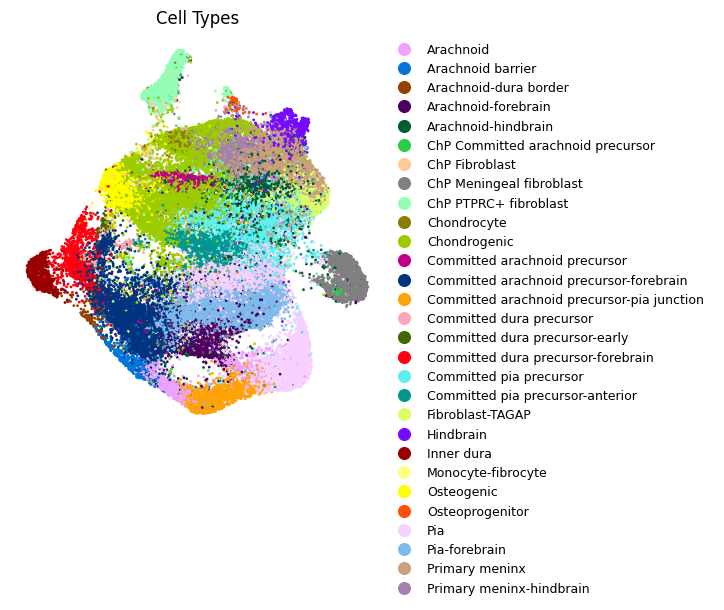

In [5]:
fig = plt.figure(None, (15, 4))
with loompy.connect(fibroblasts,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.CellType, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=4)
    ax.axis('off')
    plt.title("Cell Types")
    
    ax2 = fig.add_axes([0.42, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.4,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

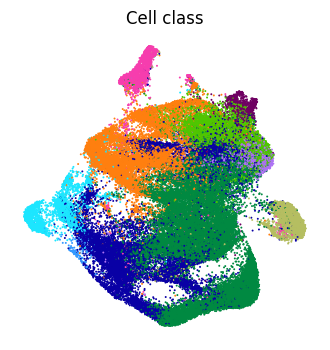

In [6]:
plt.figure(None, (4, 4))

class_color = {
    'Arachnoid': '#0900A5',
    'Arachnoid-Dura': '#3399FF',
    'ChP Fibroblast': '#F63DAE',
    'ChP Meningeal': '#B5BE61',
    'Chondrogenic': '#FF7F0F',
    'Dura': '#1CE6FF',
    'Hindbrain': '#6f0062',
    'Other': '#AC71F3',
    'Pia': '#008941',
    'Primary meninx': '#4fc601'
}

with loompy.connect(fibroblasts,'r') as ds:

    # color by donor
    labels = np.array([class_color[x] for x in ds.ca.ClassAnn])
    
    cells = np.random.permutation(ds.shape[1])
    plt.scatter(ds.ca.UMAP[cells, 0], ds.ca.UMAP[cells, 1], c=labels[cells], s=2, lw=0, rasterized=True)
    plt.title("Cell class")
    plt.axis('off')

In [7]:
#NEURAL GREY
colors_6w_G = ['#8E81FF', '#A8A8A8', '#595959', '#ff4a46', '#FF79C8', '#A8A8A8', '#8E8235','#D9D9D9',
                    '#ffff00', '#CACACA', '#CACACA', '#CACACA', '#BBBBBB', 
                    '#FCC6E0','#5a0007', '#c2ff99', '#BBBBBB', '#A8A8A8', '#949494', '#707070', 
                    '#3b5dff','#4a3b53', 
                    '#A8A8A8', '#CACACA', '#CACACA', '#6b7900', '#707070', '#707070','#A8A8A8', 
                    '#8fb0ff', '#A8A8A8', '#CACACA', '#707070', '#A8A8A8', '#A8A8A8','#CACACA', 
                    '#0aa6d8', '#013349', '#7a4900', '#372101', '#ffb500', '#c2ffed','#a079bf', '#00846f', 
                    '#595959', '#b903aa', '#4fc601', '#00489c', '#6a3a4c','#0cbd66', 
                    '#ba0900','#ff4a46', '#ff4a46']

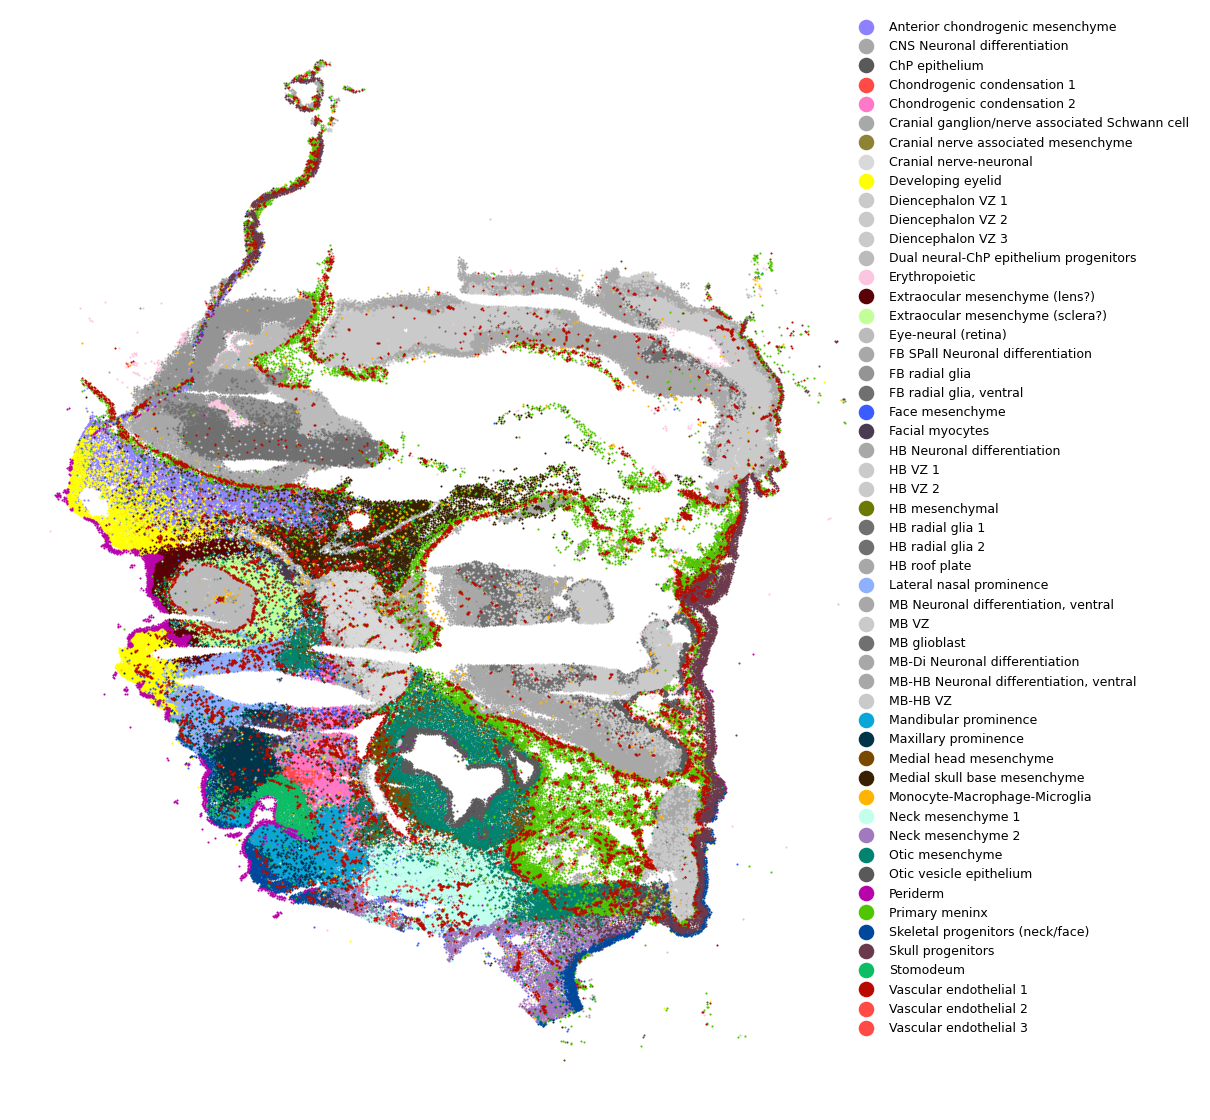

In [8]:
fig = plt.figure(None, (35, 11))
colors = colors_6w_G

with loompy.connect(Spatial_PCW6,'r') as ds:
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ClassAnn = np.unique(ds.ca.cell_type_E)
    for i,a in enumerate(ClassAnn):
        ix = (ds.ca.cell_type_E == a)
        ax.scatter(ds.ca.x_centroid[ix], ds.ca.y_centroid[ix], c=colors[i], s=2.3, lw=0, rasterized=True)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.29, 0, 0.05, 1])
    names = np.unique(ds.ca.cell_type_E)
    labels = np.unique(ds.ca.cell_type_E)
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.7,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

In [9]:
#NEURAL GREY
colors_9w_G = ['#F0E408', '#808080', '#ff34ff', '#0900A5', '#B89BF7', '#808080',
       '#707070', '#CE5AAA','#B12484','#FF79C8', '#00B0F0', '#EBF814', '#BBBBBB', '#BBBBBB',
           '#85E3F4','#8fb0ff','#448BFF','#2E75B6', '#2960FF','#9437CA', 
           '#FCC6E0',
                  '#5a0007', '#809693', '#6a3a4c','#A26033',
       '#BFBFBF', '#BBBBBB', '#808080', '#ffb500', '#71EBAB','#F63DAE', 
           '#BFBFBF', '#A8A8A8', '#D9D9D9', '#b903aa',
       '#d16100', '#008941', '#D9D9D9', '#BFBFBF', '#949494', '#300018',
       '#808080','#808080',  '#D9D9D9', 
                  '#B5BE61','#265B35','#ba0900','#ff4a46','#3ACFC8','#AAF250']

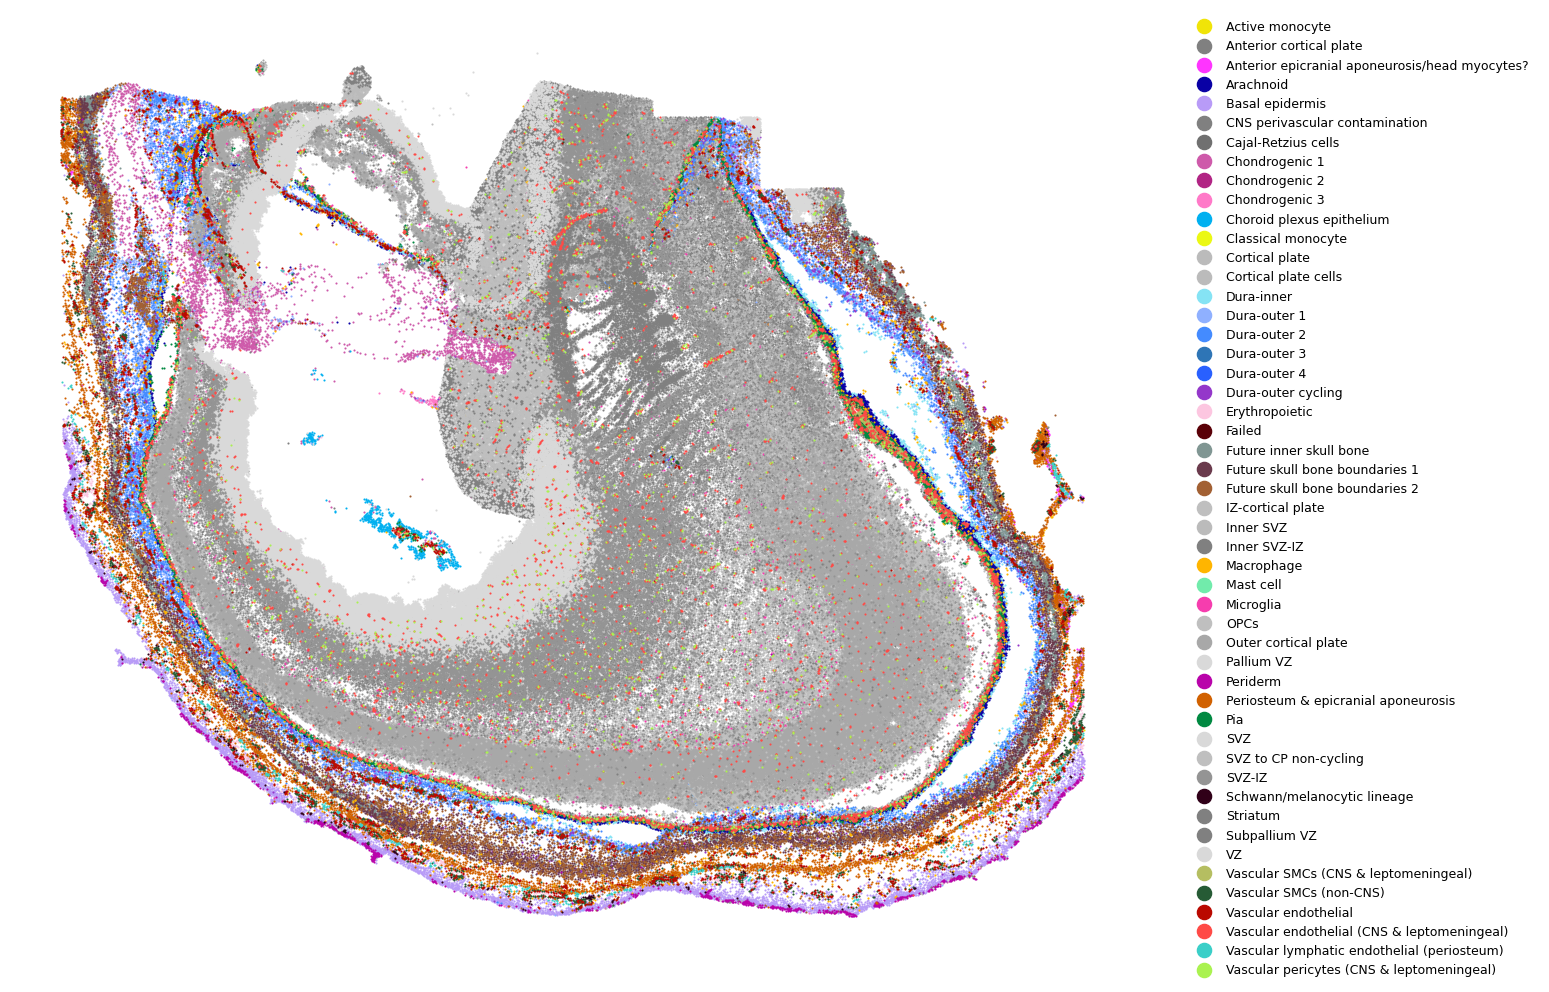

In [10]:
fig = plt.figure(None, (45, 9.5))
colors = colors_9w_G

with loompy.connect(Spatial_PCW9,'r') as ds:
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ClassAnn = np.unique(ds.ca.cell_type_E)
    for i,a in enumerate(ClassAnn):
        ix = (ds.ca.cell_type_E == a)
        ax.scatter(ds.ca.x_centroid[ix], ds.ca.y_centroid[ix], c=colors[i], 
                    s=2.3, lw=0, rasterized=True)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.29, 0, 0.05, 1])
    names = np.unique(ds.ca.cell_type_E)
    labels = np.unique(ds.ca.cell_type_E)
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.7,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

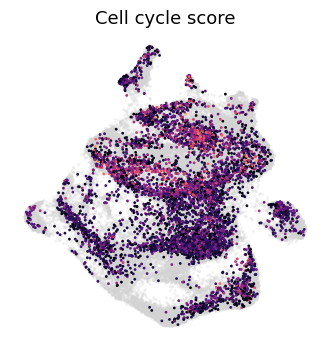

In [21]:
plt.figure(None, (4, 4))
with loompy.connect(fibroblasts, 'r') as ds:

    exp = ds.ca.CellCycle
    ix = exp > 0.01
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha = 0.3, lw=0, s=4)
    plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='magma', lw=0, s=4)
    plt.axis('off')
    plt.title('Cell cycle score',fontsize=13)

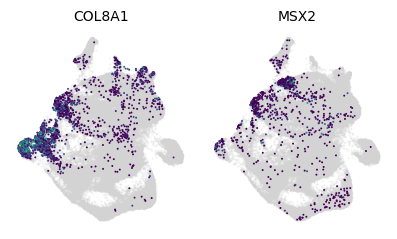

In [23]:
with loompy.connect(fibroblasts, 'r') as ds:
    
    plt.figure(None, (8, 2.5), facecolor='white')
    gs = plt.GridSpec(1, 4)

    to_plot = ['COL8A1','MSX2'] # NOV = CCN3

    for i, g in enumerate(to_plot):
        plt.subplot(gs[i])
        exp = np.log(ds[np.where(ds.ra.Gene == g)[0][0], :].flatten() + 1)
        exp_cells = exp > 1
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], color='lightgrey', alpha=0.3, s=2, lw=0, rasterized=True) #, lw=0, rasterized=True
        plt.scatter(ds.ca.UMAP[exp_cells, 0], ds.ca.UMAP[exp_cells, 1], c=exp[exp_cells], s=2, lw=0, rasterized=True) #, lw=0, rasterized=True
        plt.axis('off')
        plt.title(g, fontsize=10)
        #plt.margins(0.0, 0.0)
        plt.tight_layout()
    plt.show()

In [12]:
from cytograph.visualization import scatterm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # First get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

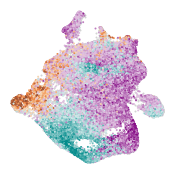

In [13]:
with loompy.connect(fibroblasts,'r') as ds:
    genes = ["LAMC3", "SLC22A6", "COL8A1"]
    plt.figure(None, (2, 2))
    light_color = cmap_map(lambda x: x/1.3 + 0.2, matplotlib.cm.Oranges)
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['purple', 'darkcyan', light_color],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=2,
        max_percentile=99.7,
        legend=None
    )
    plt.margins(0.01, 0.01)
    plt.axis('off')

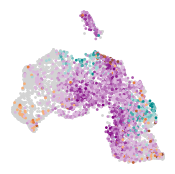

In [17]:
with loompy.connect(fibroblasts_PCW6, 'r') as ds:
    genes = ["LAMC3", "SLC22A6", "COL8A1"]
    plt.figure(None, (2, 2))
    light_color = cmap_map(lambda x: x/1.3 + 0.2, matplotlib.cm.Oranges)
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['purple', 'darkcyan', light_color],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=4,
        max_percentile=99.7,
        legend=None
    )
    plt.margins(0.01, 0.01)
    plt.axis('off')

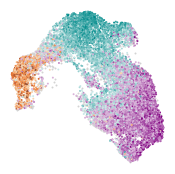

In [18]:
with loompy.connect(fibroblasts_PCW10, 'r') as ds:
    genes = ["LAMC3", "SLC22A6", "COL8A1"]
    plt.figure(None, (2, 2))
    light_color = cmap_map(lambda x: x/1.3 + 0.2, matplotlib.cm.Oranges)
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['purple', 'darkcyan', light_color],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=2,
        max_percentile=99.7,
        legend=None
    )
    plt.margins(0.01, 0.01)
    plt.axis('off')

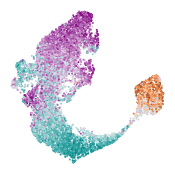

In [19]:
with loompy.connect(fibroblasts_PCW13, 'r') as ds:
    genes = ["LAMC3", "SLC22A6", "COL8A1"]
    plt.figure(None, (2, 2))
    light_color = cmap_map(lambda x: x/1.3 + 0.2, matplotlib.cm.Oranges)
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['purple', 'darkcyan', light_color],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=2,
        max_percentile=99.7,
        legend=None
    )
    plt.margins(0.01, 0.01)
    plt.axis('off')

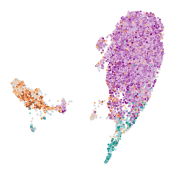

In [20]:
with loompy.connect(fibroblasts_adult, 'r') as ds:
    genes = ["LAMC3", "SLC22A6", "COL8A1"]
    plt.figure(None, (2, 2))
    light_color = cmap_map(lambda x: x/1.3 + 0.2, matplotlib.cm.Oranges)
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['purple', 'darkcyan', light_color],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=2,
        max_percentile=99.7,
        legend=None
    )
    plt.margins(0.01, 0.01)
    plt.axis('off')

# Enriched genes in adult meninges (for creating a layer-score)

In [3]:
with loompy.connect(fibroblasts_adult, 'r') as ds:
    labels = ds.ca.ClassAnn
    print(labels)

['Pia' 'Pia' 'Pia' ... 'Arachnoid' 'Arachnoid' 'Arachnoid']


In [4]:
le = LabelEncoder().fit(labels)

In [5]:
label_ix = le.transform(labels)
label_ix

array([3, 3, 3, ..., 0, 0, 0])

In [6]:
le.inverse_transform(label_ix) 

array(['Pia', 'Pia', 'Pia', ..., 'Arachnoid', 'Arachnoid', 'Arachnoid'],
      dtype=object)

In [7]:
with loompy.connect(fibroblasts_adult, 'r') as ds:
    labels = ds.ca.ClassAnn
    le = LabelEncoder().fit(labels)
    label_ix = le.transform(labels)
    means = npg.aggregate(label_ix, ds[:, :], func='mean', axis=1)

In [8]:
with loompy.connect(fibroblasts_adult, 'r') as ds:
    batch_size = 1000
    n_clusters = label_ix.max() + 1
    nonzeros = np.empty((ds.shape[0], n_clusters))

    for ix in range(0, ds.shape[0], batch_size):
        vals = ds[ix:ix + batch_size, :]
        nnz = npg.aggregate(label_ix, vals > 0, func='sum', axis=1)
        nonzeros[ix:ix + batch_size, :] = nnz

In [9]:
import numpy_groupies as npg

n_clusters = means.shape[1]
cluster_size = np.bincount(label_ix)
f_nnz = nonzeros / cluster_size

# calculate enrichment scores
enrichment = np.zeros_like(means)
for j in range(n_clusters):
    # calculate cluster weights
    ix = np.arange(n_clusters) != j
    weights = cluster_size[ix] / cluster_size[ix].sum()
    # calculate means_other as weighted average
    means_other = np.average(means[:, ix], weights=weights, axis=1)
    # calculate f_nnz as weighted average
    f_nnz_other = np.average(f_nnz[:, ix], weights=weights, axis=1)
    # calculate enrichment
    enrichment[:, j] = (f_nnz[:, j] + 0.1) / (f_nnz_other + 0.1) * (means[:, j] + 0.01) / (means_other + 0.01)

In [10]:
dict(zip(label_ix, le.inverse_transform(label_ix))) 

{3: 'Pia', 2: 'Other', 1: 'Dura', 0: 'Arachnoid'}

In [11]:
label_ix

array([3, 3, 3, ..., 0, 0, 0])

In [12]:
with loompy.connect(fibroblasts_adult, 'r') as ds:

    top_genes = ds.ra.Gene[np.argsort(enrichment[:, 0])[::-1]] #
top_genes[:10]

array(['AC090531.1', 'MAPK4', 'SLC5A5', 'SLC13A3', 'SNCAIP', 'TRPM3',
       'SLC22A8', 'RSPO2', 'LINC01182', 'CABLES1'], dtype=object)

In [13]:
import pandas as pd
with loompy.connect(fibroblasts_adult, 'r') as ds:
    
    n_labels = label_ix.max() + 1
    n_markers = 50

    included = []
    for ix in range(n_labels):
        print(ix)
        enriched = np.argsort(enrichment[:, ix])[::-1]
        n = 0
        count = 0
        
        while count < n_markers:
            included.append(enriched[n])
            n += 1
            count += 1
            
    markers = np.array(included)
    print(ds.ra.Gene[markers])

0
1
2
3
['AC090531.1' 'MAPK4' 'SLC5A5' 'SLC13A3' 'SNCAIP' 'TRPM3' 'SLC22A8'
 'RSPO2' 'LINC01182' 'CABLES1' 'TP53I11' 'PRDM6' 'IL18' 'SLC9A2' 'SLC22A6'
 'GJB6' 'GALNT17' 'CACNA1A' 'NNAT' 'LINC00499' 'AF279873.3' 'MYRIP'
 'KCNT1' 'CNTN3' 'SLC13A4' 'CPAMD8' 'IGF2BP2' 'SEMA3A' 'LCNL1' 'KDR'
 'ATP8B4' 'SLC22A2' 'CMYA5' 'NCAM1' 'AC090993.1' 'TRDN' 'ZNF536' 'COCH'
 'MICOS10' 'AL356094.2' 'TIAM1' 'EPHA7' 'LYPD6' 'ALCAM' 'IGFN1' 'DOCK8'
 'AC009879.4' 'FAM160A1' 'DAPK1' 'SLC22A3' 'KCNMA1' 'SLC4A4' 'PTGDR'
 'SULF1' 'SFRP2' 'NPNT' 'SLIT2' 'EYS' 'SLPI' 'C8orf34' 'GPC5-AS1' 'MEOX2'
 'SLC26A2' 'GADL1' 'AC090679.2' 'CDON' 'AFAP1L1' 'AL365475.1' 'CDH1'
 'SLC16A9' 'MET' 'KCTD8' 'SULT1E1' 'NET1' 'AL356737.2' 'C8orf34-AS1'
 'ABCB1' 'GPC6' 'SLC26A7' 'NMNAT2' 'AC008591.1' 'FLNB' 'PAQR5' 'LINGO2'
 'PLCE1' 'NIBAN1' 'EYA2' 'PIEZO2' 'GUCY1A1' 'AC006525.1' 'SLC9B2' 'SNTG2'
 'KLF5' 'KLHL14' 'AGMO' 'LRMDA' 'KCNMA1-AS1' 'STXBP6' 'ID1' 'AGBL1' 'NPR3'
 'LINC02126' 'TARID' 'TCF21' 'CP' 'TTR' 'PLCXD3' 'C6' 'SLC2A1' 'DA

In [14]:
with loompy.connect(fibroblasts_adult, 'r') as ds:
    print('Arachnoid',(ds.ra.Gene[markers])[:50])
    print('Dura',(ds.ra.Gene[markers])[50:100])
    print('Other',(ds.ra.Gene[markers])[100:150])
    print('Pia', (ds.ra.Gene[markers])[150:200])

Arachnoid ['AC090531.1' 'MAPK4' 'SLC5A5' 'SLC13A3' 'SNCAIP' 'TRPM3' 'SLC22A8'
 'RSPO2' 'LINC01182' 'CABLES1' 'TP53I11' 'PRDM6' 'IL18' 'SLC9A2' 'SLC22A6'
 'GJB6' 'GALNT17' 'CACNA1A' 'NNAT' 'LINC00499' 'AF279873.3' 'MYRIP'
 'KCNT1' 'CNTN3' 'SLC13A4' 'CPAMD8' 'IGF2BP2' 'SEMA3A' 'LCNL1' 'KDR'
 'ATP8B4' 'SLC22A2' 'CMYA5' 'NCAM1' 'AC090993.1' 'TRDN' 'ZNF536' 'COCH'
 'MICOS10' 'AL356094.2' 'TIAM1' 'EPHA7' 'LYPD6' 'ALCAM' 'IGFN1' 'DOCK8'
 'AC009879.4' 'FAM160A1' 'DAPK1' 'SLC22A3']
Dura ['KCNMA1' 'SLC4A4' 'PTGDR' 'SULF1' 'SFRP2' 'NPNT' 'SLIT2' 'EYS' 'SLPI'
 'C8orf34' 'GPC5-AS1' 'MEOX2' 'SLC26A2' 'GADL1' 'AC090679.2' 'CDON'
 'AFAP1L1' 'AL365475.1' 'CDH1' 'SLC16A9' 'MET' 'KCTD8' 'SULT1E1' 'NET1'
 'AL356737.2' 'C8orf34-AS1' 'ABCB1' 'GPC6' 'SLC26A7' 'NMNAT2' 'AC008591.1'
 'FLNB' 'PAQR5' 'LINGO2' 'PLCE1' 'NIBAN1' 'EYA2' 'PIEZO2' 'GUCY1A1'
 'AC006525.1' 'SLC9B2' 'SNTG2' 'KLF5' 'KLHL14' 'AGMO' 'LRMDA' 'KCNMA1-AS1'
 'STXBP6' 'ID1' 'AGBL1']
Other ['NPR3' 'LINC02126' 'TARID' 'TCF21' 'CP' 'TTR' 'PLCXD3' '

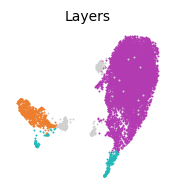

In [15]:
colors = ['#B33BB2', '#24B9B9', '#EC7E2E', '#D0D0D0']
layer = ['Pia', 'Arachnoid', 'Dura', 'Other']

plt.figure(None, (2,2))
with loompy.connect(fibroblasts_adult, 'r') as ds: 

    for i,a in enumerate(layer):
        exp = ds.ca.ClassAnn
        ix = (ds.ca.ClassAnn == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i],lw=0, s=2) #, c=colors[i]
        plt.axis('off')
        plt.title('Layers',fontsize=10)

In [16]:
import loompy
import numpy as np

ccmarkers = [ ["Dura", ['KCNMA1', 'SLC4A4', 'PTGDR', 'SULF1', 'SFRP2', 'NPNT', 'SLIT2', 'EYS', \
                             'SLPI', 'C8orf34', 'GPC5-AS1', 'MEOX2', 'SLC26A2', 'GADL1', 'AC090679.2',\
                             'CDON', 'AFAP1L1', 'AL365475.1', 'CDH1', 'SLC16A9', 'MET', 'KCTD8', 'SULT1E1', \
                              'NET1', 'AL356737.2', 'C8orf34-AS1', 'ABCB1', 'GPC6', 'SLC26A7', 'NMNAT2', \
                             'AC008591.1', 'FLNB', 'PAQR5', 'LINGO2', 'PLCE1', 'NIBAN1', 'EYA2', 'PIEZO2', \
                             'GUCY1A1', 'AC006525.1', 'SLC9B2', 'SNTG2', 'KLF5', 'KLHL14', 'AGMO', 'LRMDA', \
                             'KCNMA1-AS1', 'STXBP6', 'ID1', 'AGBL1']],
             ["Arachnoid", ['AC090531.1', 'MAPK4', 'SLC5A5', 'SLC13A3', 'SNCAIP', 'TRPM3', 'SLC22A8', 'RSPO2', \
                       'LINC01182', 'CABLES1', 'TP53I11', 'PRDM6', 'IL18', 'SLC9A2', 'SLC22A6', 'GJB6', \
                       'GALNT17', 'CACNA1A', 'NNAT', 'LINC00499', 'AF279873.3', 'MYRIP', 'KCNT1', 'CNTN3', \
                       'SLC13A4', 'CPAMD8', 'IGF2BP2', 'SEMA3A', 'LCNL1', 'KDR', 'ATP8B4', 'SLC22A2', 'CMYA5', \
                       'NCAM1', 'AC090993.1', 'TRDN', 'ZNF536', 'COCH', 'MICOS10', 'AL356094.2', 'TIAM1', \
                       'EPHA7', 'LYPD6', 'ALCAM', 'IGFN1', 'DOCK8', 'AC009879.4', 'FAM160A1', 'DAPK1', 'SLC22A3']],
             ["Pia", ['AC097528.1', 'KCNIP1', 'KCNK17', 'GRIA4', 'CYTL1', 'ASPN', 'COL12A1', 'IQGAP2',
                       'FAP', 'RNF220', 'CDH6', 'FMO2', 'AL033523.1', 'AL445250.1', 'FGF1' ,'ISM1',
                       'PAMR1', 'LAMC3', 'DLEU7', 'SCN4A', 'ADAMTS8', 'LINC02664', 'ATRNL1', 'FHL2',
                       'LEF1', 'FBLN2', 'GPC3', 'AC011503.1', 'AC093772.1', 'THBS1', 'AL391477.1',
                       'EFCC1', 'KCNMB1', 'EDN3' ,'AC019197.1', 'F13A1', 'SRPX2', 'ALDH1A1', 'KCNE4',
                       'RERG', 'SNTB1', 'DOCK10', 'F2R', 'ZNF385D', 'COL15A1', 'OSBPL3', 'TMEM71',
                       'AKR1C2', 'PAG1', 'SLCO2B1']]
            ]

In [17]:
# Filter away genes expressed at week 5-6

ccmarkers_notw56 = []
with loompy.connect(fibroblasts, "r") as ds:
    w56idx = ds.ca.Age < 7.0
    for cellclass, markers in ccmarkers:
        notw56 = []
        for marker in markers:
            if marker not in ds.ra.Gene:
                print(marker, "missing")
                continue
            markerexpr = ds[ds.ra.Gene==marker,:]
            # Expressed in week 5-6 criterium: At least 15% of cells should have one transcript:
            expressed_in_w56 = sum(markerexpr[:,w56idx][0] > 0) > 0.15 * sum(w56idx)
            if not expressed_in_w56:
                notw56.append(marker)
        print(cellclass, "original:", len(markers), "remains:", len(notw56), "not expressed in week 5-6")
        ccmarkers_notw56.append( [cellclass, notw56] )

AL365475.1 missing
AL356737.2 missing
NIBAN1 missing
AC006525.1 missing
Dura original: 50 remains: 34 not expressed in week 5-6
MICOS10 missing
AL356094.2 missing
AC009879.4 missing
Arachnoid original: 50 remains: 34 not expressed in week 5-6
AC097528.1 missing
AL033523.1 missing
LINC02664 missing
AL391477.1 missing
Pia original: 50 remains: 29 not expressed in week 5-6


# Layer score in fetal meninges fibroblasts

In [19]:
def do_counting(loomfile, agepools, expr_threshold, min_frac_markers):
    """ Count cells expressing genes from either cellclass
        agepools           List of lists of ages that should be pooled, or None for no pooling
        threshold          A gene with count below this value in a cell is considered not expressed
        min_frac_markers   At least this fraction of markers should be expressed in a cell to not become "Other" """
    nagepools = len(agepools)
    ncelltypes = len(ccmarkers) + 1
    markersexprs = []
    cc_markeridx = []
    cc_markercount = []
    with loompy.connect(loomfile, "r") as ds:
        for cellclass, markers in ccmarkers_notw56:
            markerindices = np.isin(ds.ra.Gene, markers)
            markersexpr = ds[markerindices,:]
            markersexpr[markersexpr < threshold] = 0
            markersexprs.append(markersexpr)
            cc_markeridx.append([cellclass, markerindices])
            cc_markercount.append(float(len(markers)))
        ages = list(set(ds.ca.Age))
        ages.sort()
        for age in ages:
            for agepoolidx,ap in enumerate(agepools):
                if age in ap:
                    break
            else:
                raise ValueError("No matching agepool for age %s - skipping." % age)            
        if agepools == None:
            agepools = [ [a] for a in ages ]
        counts = np.zeros([len(agepools), ncelltypes])
        for age in ages:
            for agepoolidx,ap in enumerate(agepools):
                if age in ap:
                    break
            agecells = np.nonzero(ds.ca.Age == age)[0]
            agecounts = np.zeros(ncelltypes)
            for cellidx in agecells:
                means = []
                exprlevel_by_cellclass = np.zeros(ncelltypes)
                for ccidx, markersexpr in enumerate(markersexprs):
                    markerexpr = markersexpr[:,cellidx]
                    # Use fraction of markers above threshold of the cell as level
                    exprlevel = np.count_nonzero(markerexpr) / cc_markercount[ccidx]
                    ## Use mean of the cell class markers' expression as level
                    exprlevel_by_cellclass[ccidx] = exprlevel
                # Determine the winning cell class for this cell, or if it should be classified "Other"
                idxofwinner = 0 if np.all(exprlevel_by_cellclass < min_frac_markers) else np.argmax(exprlevel_by_cellclass)+1
                agecounts[idxofwinner] += 1
            counts[agepoolidx,:] += agecounts
            print("Age:%s (pool %s)\t#cells:%s\t#PerClass:%s" % (age, agepoolidx, len(agecells), agecounts))
    return counts

def plot_bars(counts, agepools):
    """ Plot stacked bars from (pooled) counts """
    import matplotlib.pyplot as plt
    import numpy as np

    # Define the colors
    colors = ['#CACACA','#E37532','#34AFAF','#A739A7']

    # Ensure the number of colors matches the number of cell types
    assert len(colors) >= counts.shape[1], "Not enough colors for the cell types"

    ncelltypes = counts.shape[1]
    sums = np.sum(counts, axis=1)
    normed = counts / (0.00001 + sums)[:, np.newaxis]
    cellclass = ["Other"] + [cc[0] for cc in ccmarkers]
    fig, ax = plt.subplots(figsize=(7, 4))
    width = 0.9
    xticks = [("%s" % ",".join([str(a) + "w" for a in ap])) for ap in agepools]
    bottom = np.zeros(len(agepools))

    for ccidx in range(ncelltypes - 1, -1, -1):
        ax.bar(xticks, normed[:, ccidx], width, label=cellclass[ccidx], bottom=bottom, color=colors[ccidx])
        bottom += normed[:, ccidx]

    ax.set_ylabel('fraction')
    ax.set_title('Expression of layer genes')
    ax.legend(bbox_to_anchor=(1, 1.05))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    plt.xticks(rotation=90)
    plt.ylim(0, 1.0)
    nagepools = counts.shape[0]
    #plt.savefig("fbdev_bars15_%spools_2.pdf" % nagepools, bbox_inches="tight")
    plt.show()

Age:5.5 (pool 0)	#cells:5733	#PerClass:[5501.   82.  110.   40.]
Age:6.6 (pool 1)	#cells:1762	#PerClass:[1042.  186.  196.  338.]
Age:6.7 (pool 1)	#cells:4355	#PerClass:[3794.  219.  116.  226.]
Age:7.5 (pool 2)	#cells:15661	#PerClass:[6605. 2972. 2555. 3529.]
Age:7.6 (pool 2)	#cells:4040	#PerClass:[2149.  626.  951.  314.]
Age:8.4 (pool 3)	#cells:3268	#PerClass:[1437.  296.  435. 1100.]
Age:9.0 (pool 4)	#cells:3587	#PerClass:[1657.  672.  456.  802.]
Age:9.9 (pool 4)	#cells:3204	#PerClass:[1279.  433.  574.  918.]
Age:10.0 (pool 5)	#cells:18895	#PerClass:[7430. 2614. 3478. 5373.]
Age:12.0 (pool 6)	#cells:852	#PerClass:[148. 122. 204. 378.]
Age:13.5 (pool 7)	#cells:10300	#PerClass:[ 995. 1358. 3003. 4944.]


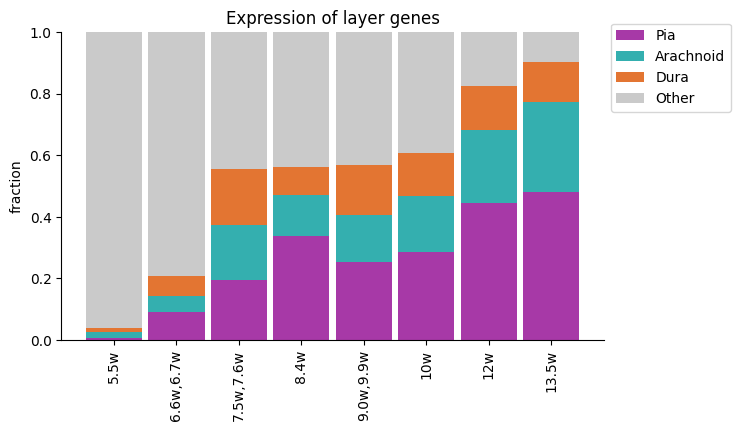

In [20]:
#loomfile = fibroblasts
threshold = 2
min_frac_markers = 0.05
agepools = [ [5.5], [6.6,6.7], [7.5,7.6], [8.4], [9.0,9.9], [10], [12], [13.5] ]
cs = do_counting(fibroblasts, agepools, threshold, min_frac_markers)
plot_bars(cs, agepools)

# Layer score in adult fibroblasts

In [23]:
def do_counting(loomfile, agepools, expr_threshold, min_frac_markers):
    """ Count cells expressing genes from either cellclass
        agepools           List of lists of ages that should be pooled, or None for no pooling
        threshold          A gene with count below this value in a cell is considered not expressed
        min_frac_markers   At least this fraction of markers should be expressed in a cell to not become "Other" """
    nagepools = len(agepools)
    ncelltypes = len(ccmarkers) + 1
    markersexprs = []
    cc_markeridx = []
    cc_markercount = []
    with loompy.connect(loomfile, "r") as ds:
        for cellclass, markers in ccmarkers_notw56:
            markerindices = np.isin(ds.ra.Gene, markers)
            markersexpr = ds[markerindices,:]
            markersexpr[markersexpr < threshold] = 0
            markersexprs.append(markersexpr)
            cc_markeridx.append([cellclass, markerindices])
            cc_markercount.append(float(len(markers)))
        ages = list(set(ds.ca.Age))
        ages.sort()
        for age in ages:
            for agepoolidx,ap in enumerate(agepools):
                if age in ap:
                    break
            else:
                raise ValueError("No matching agepool for age %s - skipping." % age)            
        if agepools == None:
            agepools = [ [a] for a in ages ]
        counts = np.zeros([len(agepools), ncelltypes])
        for age in ages:
            for agepoolidx,ap in enumerate(agepools):
                if age in ap:
                    break
            agecells = np.nonzero(ds.ca.Age == age)[0]
            agecounts = np.zeros(ncelltypes)
            for cellidx in agecells:
                means = []
                exprlevel_by_cellclass = np.zeros(ncelltypes)
                for ccidx, markersexpr in enumerate(markersexprs):
                    markerexpr = markersexpr[:,cellidx]
                    # Use fraction of markers above threshold of the cell as level
                    exprlevel = np.count_nonzero(markerexpr) / cc_markercount[ccidx]
                    ## Use mean of the cell class markers' expression as level
                    exprlevel_by_cellclass[ccidx] = exprlevel
                # Determine the winning cell class for this cell, or if it should be classified "Other"
                idxofwinner = 0 if np.all(exprlevel_by_cellclass < min_frac_markers) else np.argmax(exprlevel_by_cellclass)+1
                agecounts[idxofwinner] += 1
            counts[agepoolidx,:] += agecounts
            print("Age:%s (pool %s)\t#cells:%s\t#PerClass:%s" % (age, agepoolidx, len(agecells), agecounts))
    return counts

def plot_bars(counts, agepools):
    """ Plot stacked bars from (pooled) counts """
    import matplotlib.pyplot as plt
    import numpy as np

    # Define the colors
    colors = ['#CACACA','#E37532','#34AFAF','#A739A7']

    # Ensure the number of colors matches the number of cell types
    assert len(colors) >= counts.shape[1], "Not enough colors for the cell types"

    ncelltypes = counts.shape[1]
    sums = np.sum(counts, axis=1)
    normed = counts / (0.00001 + sums)[:, np.newaxis]
    cellclass = ["Other"] + [cc[0] for cc in ccmarkers]
    fig, ax = plt.subplots(figsize=(3.5, 4))
    width = 0.9
    xticks = [("%s" % ",".join([str(a) + "y" for a in ap])) for ap in agepools]
    bottom = np.zeros(len(agepools))

    for ccidx in range(ncelltypes - 1, -1, -1):
        ax.bar(xticks, normed[:, ccidx], width, label=cellclass[ccidx], bottom=bottom, color=colors[ccidx])
        bottom += normed[:, ccidx]

    ax.set_ylabel('fraction')
    #ax.set_title('Expression of layer genes')
    ax.legend(bbox_to_anchor=(1, 1.05))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    plt.xticks(rotation=90)
    plt.ylim(0, 1.0)
    nagepools = counts.shape[0]
    #plt.savefig(fbdev_bars20_f10_adultseparate_%spools.pdf" % nagepools, bbox_inches="tight")
    plt.show()

Age:29.0 (pool 0)	#cells:2286	#PerClass:[ 221.   72.   45. 1948.]
Age:42.0 (pool 1)	#cells:2633	#PerClass:[ 274.  239.  132. 1988.]
Age:50.0 (pool 2)	#cells:4219	#PerClass:[ 180.  478.  280. 3281.]
Age:60.0 (pool 3)	#cells:18	#PerClass:[ 2.  0.  0. 16.]


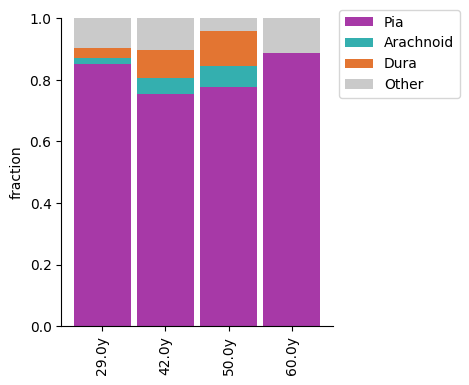

In [24]:
#loomfile = fibroblasts_adult
threshold = 2
min_frac_markers = 0.05
agepools = [ [29.0],[42.0],[50.0],[60.0] ]
cs = do_counting(fibroblasts_adult, agepools, threshold, min_frac_markers)
plot_bars(cs, agepools)

In [4]:
#Dura original: 50 remains: 34 not expressed in week 5-6 
Du_filt = ['KCNMA1', 'SLC4A4', 'PTGDR', 'NPNT', 'EYS', 'SLPI', 'C8orf34', 'GPC5-AS1', 'MEOX2', 'SLC26A2', 'GADL1', 'AC090679.2', 'CDON', 'AFAP1L1', 'CDH1', 'SLC16A9', 'MET', 'C8orf34-AS1', 'ABCB1', 'SLC26A7', 'NMNAT2', 'AC008591.1', 'PAQR5', 'LINGO2', 'EYA2', 'SLC9B2', 'SNTG2', 'KLF5', 'KLHL14', 'AGMO', 'LRMDA', 'KCNMA1-AS1', 'STXBP6', 'AGBL1']

#Arachnoid original: 50 remains: 34 not expressed in week 5-6 
Ar_filt =['AC090531.1', 'MAPK4', 'SLC5A5', 'SLC13A3', 'TRPM3', 'SLC22A8', 'RSPO2', 'LINC01182', 'CABLES1', 'TP53I11', 'IL18', 'SLC9A2', 'SLC22A6', 'GJB6', 'GALNT17', 'LINC00499', 'AF279873.3', 'MYRIP', 'KCNT1', 'CNTN3', 'SLC13A4', 'CPAMD8', 'LCNL1', 'KDR', 'ATP8B4', 'SLC22A2', 'CMYA5', 'AC090993.1', 'TRDN', 'LYPD6', 'IGFN1', 'DOCK8', 'FAM160A1', 'SLC22A3']

#Pia original: 50 remains: 29 not expressed in week 5-6 
Pi_filt = ['KCNIP1', 'KCNK17', 'GRIA4', 'ASPN', 'FMO2', 'AL445250.1', 'FGF1', 'ISM1', 'PAMR1', 'SCN4A', 'ADAMTS8', 'AC011503.1', 'AC093772.1', 'EFCC1', 'KCNMB1', 'AC019197.1', 'F13A1', 'SRPX2', 'ALDH1A1', 'KCNE4', 'RERG', 'SNTB1', 'DOCK10', 'ZNF385D', 'COL15A1', 'OSBPL3', 'TMEM71', 'AKR1C2', 'SLCO2B1']

In [6]:
with loompy.connect(fibroblasts, 'r') as ds:
    
    labels = ds.ca.Agepool8
    print(labels)

['06w' '06w' '06w' ... '13w' '13w' '13w']


In [7]:
le = LabelEncoder().fit(labels)

In [8]:
label_ix = le.transform(labels)
label_ix

array([1, 1, 1, ..., 7, 7, 7])

In [9]:
le.inverse_transform(label_ix)

array(['06w', '06w', '06w', ..., '13w', '13w', '13w'], dtype=object)

In [11]:
with loompy.connect(fibroblasts, 'r') as ds:
    labels = ds.ca.Agepool8
    le = LabelEncoder().fit(labels)
    label_ix = le.transform(labels)
    means = npg.aggregate(label_ix, ds[:, :], func='mean', axis=1)

In [12]:
dict(zip(label_ix, le.inverse_transform(label_ix))) 

{1: '06w',
 2: '07w',
 5: '10w',
 4: '09w',
 3: '08w',
 6: '12w',
 7: '13w',
 0: '05w'}

/var/folders/wx/gbfd9fc12ps1jny7tzz5w56m0000gq/T/ipykernel_85601/905863525.py:23: RuntimeWarning: invalid value encountered in divide
  meansD[:, i] = meansD[:, i] / meansD[:, i].max()


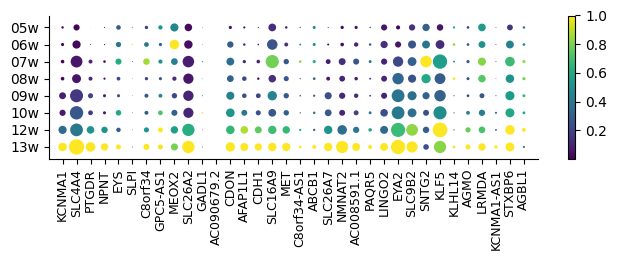

In [15]:
# DURA GENES PER AGE

tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

with loompy.connect(fibroblasts, 'r') as ds:

    #plt.figure(figsize = (13, 2.4), tight_layout = {'pad': 0})
    plt.figure(figsize = (6.5, 2.4), tight_layout = {'pad': 0})
    
    genes = Du_filt 
    
    unique_clusters = np.unique(label_ix)
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    meansD = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        meansD[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        meansD[:, i] = meansD[:, i] / meansD[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=fnnz.flatten()*300, c=meansD.flatten(), lw=0, rasterized=True)
    
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=10)
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical', fontsize=9)
    
    plt.margins(0.03, 0.1)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.colorbar()

In [14]:
array_with_nans = meansD

# Replace nan values with 0
array_without_nans = np.nan_to_num(array_with_nans, nan=0.0)

print(array_without_nans)

[[2.79418425e-03 1.03967822e-02 5.92942588e-04 6.26334414e-03
  2.94317451e-01 8.20754322e-01 1.80612193e-01 5.32957994e-01
  4.64403195e-01 2.94651687e-02 1.46481378e-01 0.00000000e+00
  4.63725185e-02 4.90543628e-02 1.16663380e-02 1.26244889e-01
  5.15158716e-02 1.61372697e-01 5.21271680e-01 2.15602558e-03
  2.39934916e-02 4.89449215e-02 8.06990643e-02 5.68052154e-02
  2.11887088e-02 1.41846906e-01 3.04384950e-01 5.80760468e-02
  6.10035446e-01 1.64411811e-01 5.47864833e-01 4.65789377e-02
  1.54077013e-01 3.71533233e-01]
 [5.27912175e-03 2.22598130e-02 5.00148094e-03 6.77325803e-03
  3.94573145e-01 1.00000000e+00 4.04730545e-01 3.12188187e-01
  1.00000000e+00 3.85993986e-02 1.37285888e-01 0.00000000e+00
  2.92268253e-01 7.37514531e-02 1.77677073e-02 2.61522923e-01
  1.36547300e-01 4.63809993e-01 5.45466651e-01 1.05075320e-02
  3.39247734e-02 1.04399165e-01 3.06513132e-01 1.27887402e-01
  6.18670759e-02 2.60566990e-01 3.94588632e-01 1.25233879e-01
  8.34177931e-01 2.52351465e-01 5.082

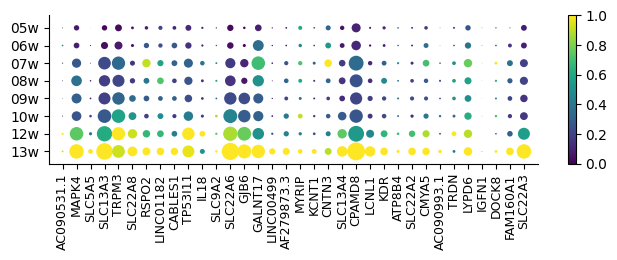

In [16]:
# ARACHNOID GENES PER AGE

tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

with loompy.connect(fibroblasts, 'r') as ds:
    plt.figure(figsize = (6.5, 2.4), tight_layout = {'pad': 0})
    
    genes = Ar_filt
    
    unique_clusters = np.unique(label_ix)
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    meansA = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        meansA[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        meansA[:, i] = meansA[:, i] / meansA[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=fnnz.flatten()*300, c=meansA.flatten(), lw=0, rasterized=True)
    
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=10)
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical', fontsize=9)
    
    plt.margins(0.03, 0.1)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.colorbar()

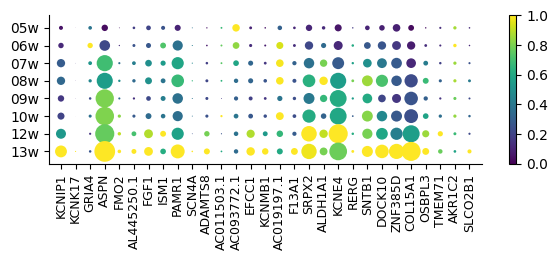

In [17]:
# PIA GENES PER AGE

tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

with loompy.connect(fibroblasts, 'r') as ds:
    plt.figure(figsize = (5.8, 2.4), tight_layout = {'pad': 0})
    
    genes = Pi_filt
    
    unique_clusters = np.unique(label_ix)
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    means = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        means[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        means[:, i] = means[:, i] / means[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=fnnz.flatten()*300, c=means.flatten(), lw=0, rasterized=True)
    
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=10)
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical', fontsize=9)
    
    plt.margins(0.03, 0.1)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.colorbar()

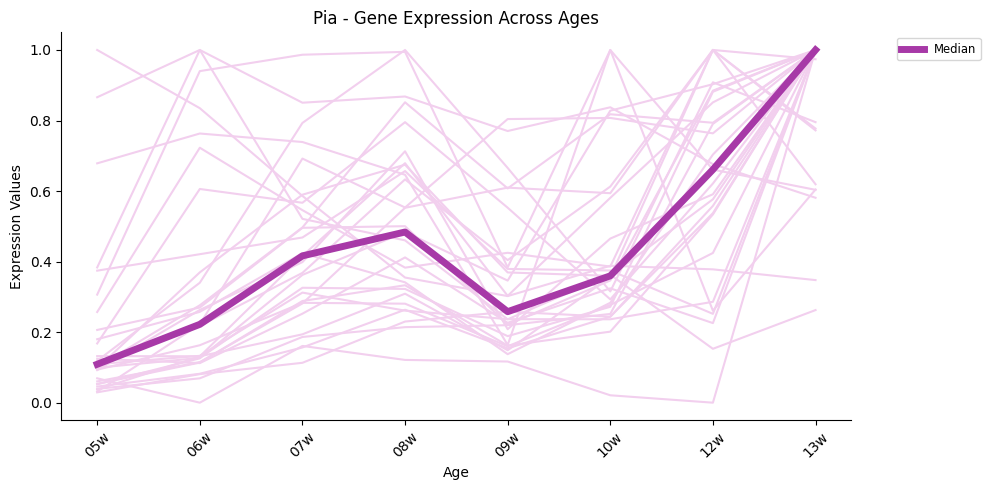

In [18]:
tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

with loompy.connect(fibroblasts, 'r') as ds:
    
    Pi_filt = ['KCNIP1', 'KCNK17', 'GRIA4', 'ASPN', 'FMO2', 'AL445250.1', 'FGF1', 'ISM1', 'PAMR1', 'SCN4A', 'ADAMTS8', 'AC011503.1', 'AC093772.1', 'EFCC1', 'KCNMB1', 'AC019197.1', 'F13A1', 'SRPX2', 'ALDH1A1', 'KCNE4', 'RERG', 'SNTB1', 'DOCK10', 'ZNF385D', 'COL15A1', 'OSBPL3', 'TMEM71', 'AKR1C2', 'SLCO2B1']    
    
    expression_values = means

    # Transpose the array to get it in the shape of (number of genes, number of timepoints)
    expression_values = expression_values.T
    median_expression_values = np.median(expression_values, axis=0)

    plt.figure(figsize=(10, 5))
    for i, gene in enumerate(Pi_filt):
        plt.plot(tick_labels, expression_values[i, :], color='#F2CFEE')

    # Plot the median expression values
    plt.plot(tick_labels, median_expression_values, color='#A739A7', linewidth=5, label='Median')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Age')
    plt.ylabel('Expression Values')
    plt.title('Pia - Gene Expression Across Ages')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

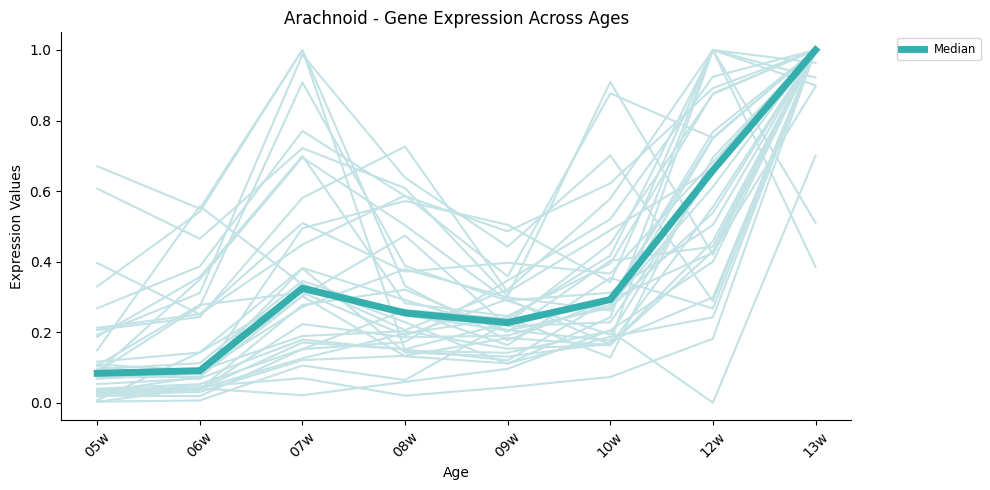

In [19]:
tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

with loompy.connect(fibroblasts, 'r') as ds:
    
    genes = Ar_filt    
    expression_values = meansA

    # Transpose the array to get it in the shape of (number of genes, number of timepoints)
    expression_values = expression_values.T
    median_expression_valuesA = np.median(expression_values, axis=0)

    plt.figure(figsize=(10, 5))
    for i, gene in enumerate(Ar_filt):
        plt.plot(tick_labels, expression_values[i, :], color='#C2E2E5')

    # Plot the median expression values
    plt.plot(tick_labels, median_expression_valuesA, color='#34AFAD', linewidth=5, label='Median')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Age')
    plt.ylabel('Expression Values')
    plt.title('Arachnoid - Gene Expression Across Ages')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

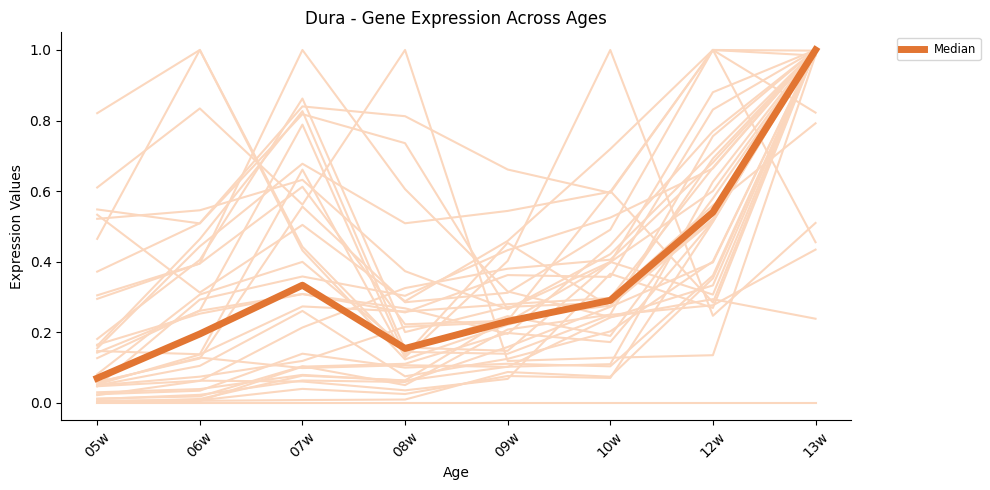

In [21]:
tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

with loompy.connect(fibroblasts, 'r') as ds:
    
    genes = Du_filt 
    expression_values = array_without_nans

    # Transpose the array to get it in the shape of (number of genes, number of timepoints)
    expression_values = expression_values.T
    median_expression_valuesD = np.median(expression_values, axis=0)

    plt.figure(figsize=(10, 5))
    for i, gene in enumerate(Du_filt):
        plt.plot(tick_labels, expression_values[i, :], color='#FBD7BE')

    # Plot the median expression values
    plt.plot(tick_labels, median_expression_valuesD, color='#E27532', linewidth=5, label='Median')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Age')
    plt.ylabel('Expression Values')
    plt.title('Dura - Gene Expression Across Ages')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

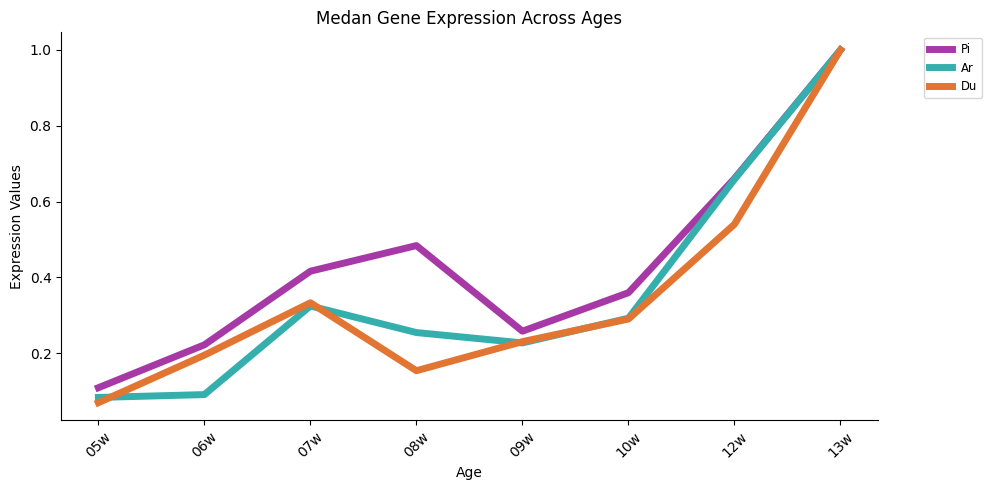

In [22]:
tick_labels = ['05w','06w','07w','08w','09w','10w','12w','13w']

#median_expression_values = []
#median_expression_valuesA = []
#median_expression_valuesD = []

with loompy.connect(fibroblasts, 'r') as ds:
    
    Pi = median_expression_values
    Ar = median_expression_valuesA
    Du = median_expression_valuesD

    plt.figure(figsize=(10, 5))
    
    plt.plot(tick_labels, Pi, color='#A739A7', linewidth=5, label='Pi')
    plt.plot(tick_labels, Ar, color='#34AFAD', linewidth=5, label='Ar')
    plt.plot(tick_labels, Du, color='#E27532', linewidth=5, label='Du')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Age')
    plt.ylabel('Expression Values')
    plt.title('Medan Gene Expression Across Ages')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

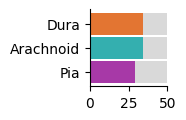

In [23]:
layers = ("Dura", "Arachnoid", "Pia")
weight_counts = {
    "Below": np.array([34, 34, 29]),
    "Above": np.array([16, 16, 21]),
}
width = 0.9

below_colors = ['#E37532', '#34AFAF', '#A739A7']
above_color = '#D9D9D9'

fig, ax = plt.subplots(figsize=(1, 1))
bottom = np.zeros(len(layers))
ax.barh(layers, weight_counts['Below'], width, label='Below', color=below_colors)
bottom = weight_counts['Below']
ax.barh(layers, weight_counts['Above'], width, label='Above', left=bottom, color=above_color)

ax.invert_yaxis()  # labels read top-to-bottom
plt.xticks(np.arange(0, 51, step=25))
plt.xlim(0, 50)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

# Layer score in meningioma (Fig. 7)

In [28]:
def do_counting(loomfile, agepools, expr_threshold, min_frac_markers):
    """ Count cells expressing genes from either cellclass
        agepools           List of lists of ages that should be pooled, or None for no pooling
        threshold          A gene with count below this value in a cell is considered not expressed
        min_frac_markers   At least this fraction of markers should be expressed in a cell to not become "Other" """
    nagepools = len(agepools)
    ncelltypes = len(ccmarkers) + 1
    markersexprs = []
    cc_markeridx = []
    cc_markercount = []
    with loompy.connect(loomfile, "r") as ds:
        for cellclass, markers in ccmarkers_notw56:
            markerindices = np.isin(ds.ra.Gene, markers)
            markersexpr = ds[markerindices,:]
            markersexpr[markersexpr < threshold] = 0
            markersexprs.append(markersexpr)
            cc_markeridx.append([cellclass, markerindices])
            cc_markercount.append(float(len(markers)))
        ages = list(set(ds.ca.Choudhury_ClusterName)) #list(set(ds.ca.Age))
        ages.sort()
        for age in ages:
            for agepoolidx,ap in enumerate(agepools):
                if age in ap:
                    break
            else:
                raise ValueError("No matching agepool for age %s - skipping." % age)            
        if agepools == None:
            agepools = [ [a] for a in ages ]
        counts = np.zeros([len(agepools), ncelltypes])
        for age in ages:
            for agepoolidx,ap in enumerate(agepools):
                if age in ap:
                    break
            agecells = np.nonzero(ds.ca.Choudhury_ClusterName == age)[0]
            agecounts = np.zeros(ncelltypes)
            for cellidx in agecells:
                means = []
                exprlevel_by_cellclass = np.zeros(ncelltypes)
                for ccidx, markersexpr in enumerate(markersexprs):
                    markerexpr = markersexpr[:,cellidx]
                    # Use fraction of markers above threshold of the cell as level
                    exprlevel = np.count_nonzero(markerexpr) / cc_markercount[ccidx]
                    ## Use mean of the cell class markers' expression as level
                    exprlevel_by_cellclass[ccidx] = exprlevel
                # Determine the winning cell class for this cell, or if it should be classified "Other"
                idxofwinner = 0 if np.all(exprlevel_by_cellclass < min_frac_markers) else np.argmax(exprlevel_by_cellclass)+1
                agecounts[idxofwinner] += 1
            counts[agepoolidx,:] += agecounts
            print("Age:%s (pool %s)\t#cells:%s\t#PerClass:%s" % (age, agepoolidx, len(agecells), agecounts))
    return counts

def plot_bars(counts, agepools):
    """ Plot stacked bars from (pooled) counts """
    import matplotlib.pyplot as plt
    import numpy as np

    # Define the colors
    colors = ['#CACACA','#E37532','#34AFAF','#A739A7']

    # Ensure the number of colors matches the number of cell types
    assert len(colors) >= counts.shape[1], "Not enough colors for the cell types"

    ncelltypes = counts.shape[1]
    sums = np.sum(counts, axis=1)
    normed = counts / (0.00001 + sums)[:, np.newaxis]
    cellclass = ["Other"] + [cc[0] for cc in ccmarkers]
    fig, ax = plt.subplots(figsize=(7, 4))
    width = 0.9
    xticks = [("%s" % ",".join([str(a) + "y" for a in ap])) for ap in agepools]
    bottom = np.zeros(len(agepools))

    for ccidx in range(ncelltypes - 1, -1, -1):
        ax.bar(xticks, normed[:, ccidx], width, label=cellclass[ccidx], bottom=bottom, color=colors[ccidx])
        bottom += normed[:, ccidx]

    ax.set_ylabel('fraction')
    #ax.set_title('Expression of layer genes')
    ax.legend(bbox_to_anchor=(1, 1.05))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    plt.xticks(rotation=90)
    plt.ylim(0, 1.0)
    nagepools = counts.shape[0]
    #plt.savefig("fbdev_bars15_menO_Ch_CN_%spools.pdf" % nagepools, bbox_inches="tight") #fbdev_bars15_menO_CH_Source_%spools.pdf
    plt.show()

Age:Active monocytes (pool 9)	#cells:22	#PerClass:[ 2. 16.  1.  3.]
Age:CD163 monocytes (pool 9)	#cells:75	#PerClass:[ 0. 72.  1.  2.]
Age:CD4 T cells (pool 9)	#cells:17	#PerClass:[3. 7. 0. 7.]
Age:CD8 T cells (pool 9)	#cells:94	#PerClass:[ 6. 73.  3. 12.]
Age:Cycling G2M phase meningioma cells 1 (pool 2)	#cells:450	#PerClass:[276. 157.   7.  10.]
Age:Cycling G2M phase meningioma cells 2 (pool 3)	#cells:2924	#PerClass:[ 749. 1625.  162.  388.]
Age:Cycling S phase meningioma cells (pool 4)	#cells:5390	#PerClass:[2134. 2133.  325.  798.]
Age:ECM remodeling meningioma cells (pool 5)	#cells:9647	#PerClass:[2.100e+01 9.615e+03 2.000e+00 9.000e+00]
Age:Excluded (pool 0)	#cells:9997	#PerClass:[ 905. 8907.   53.  132.]
Age:G1 phase meningioma cells (pool 1)	#cells:9944	#PerClass:[1.100e+01 9.928e+03 2.000e+00 3.000e+00]
Age:Glia (pool 9)	#cells:85	#PerClass:[12. 64.  0.  9.]
Age:Meningioma cells (pool 6)	#cells:1926	#PerClass:[  91. 1821.    5.    9.]
Age:Monocytes (pool 9)	#cells:97	#PerClass

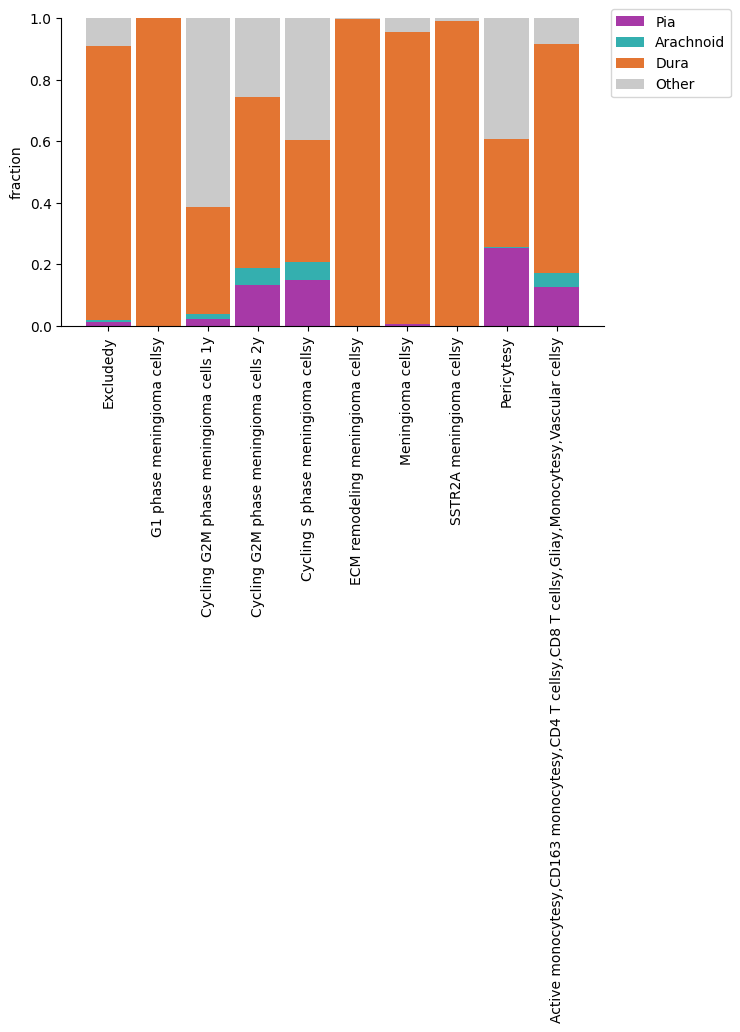

In [30]:
#loomfile = fibroblasts_PCs_meningioma
threshold = 2
min_frac_markers = 0.05
agepools = [ ['Excluded'],['G1 phase meningioma cells'],['Cycling G2M phase meningioma cells 1'],['Cycling G2M phase meningioma cells 2'],['Cycling S phase meningioma cells'],
           ['ECM remodeling meningioma cells'],['Meningioma cells'],['SSTR2A meningioma cells'],['Pericytes'],
           ['Active monocytes', 'CD163 monocytes', 'CD4 T cells', 'CD8 T cells','Glia','Monocytes','Vascular cells']]
 
cs = do_counting(fibroblasts_PCs_meningioma, agepools, threshold, min_frac_markers)
plot_bars(cs, agepools)

# Enriched in fetal meninges fibroblasts

In [24]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [25]:
with loompy.connect(fibroblasts, 'r') as ds:
    labels = ds.ca.CellType
    print(labels)

['Chondrocyte' 'Chondrocyte' 'Chondrocyte' ... 'Inner dura' 'Inner dura'
 'Inner dura']


In [26]:
le = LabelEncoder().fit(labels)

In [27]:
label_ix = le.transform(labels)
label_ix

array([ 9,  9,  9, ..., 21, 21, 21])

In [28]:
le.inverse_transform(label_ix)

array(['Chondrocyte', 'Chondrocyte', 'Chondrocyte', ..., 'Inner dura',
       'Inner dura', 'Inner dura'], dtype=object)

In [29]:
with loompy.connect(fibroblasts, 'r') as ds:
    labels = ds.ca.CellType
    le = LabelEncoder().fit(labels)
    label_ix = le.transform(labels)
    means = npg.aggregate(label_ix, ds[:, :], func='mean', axis=1)

In [30]:
with loompy.connect(fibroblasts, 'r') as ds:
    batch_size = 1000
    n_clusters = label_ix.max() + 1
    nonzeros = np.empty((ds.shape[0], n_clusters))

    for ix in range(0, ds.shape[0], batch_size):
        vals = ds[ix:ix + batch_size, :]
        nnz = npg.aggregate(label_ix, vals > 0, func='sum', axis=1)
        nonzeros[ix:ix + batch_size, :] = nnz

In [31]:
n_clusters = means.shape[1]
cluster_size = np.bincount(label_ix)
f_nnz = nonzeros / cluster_size

# calculate enrichment scores
enrichment = np.zeros_like(means)
for j in range(n_clusters):
    # calculate cluster weights
    ix = np.arange(n_clusters) != j
    weights = cluster_size[ix] / cluster_size[ix].sum()
    # calculate means_other as weighted average
    means_other = np.average(means[:, ix], weights=weights, axis=1)
    # calculate f_nnz as weighted average
    f_nnz_other = np.average(f_nnz[:, ix], weights=weights, axis=1)
    # calculate enrichment
    enrichment[:, j] = (f_nnz[:, j] + 0.1) / (f_nnz_other + 0.1) * (means[:, j] + 0.01) / (means_other + 0.01)

In [32]:
dict(zip(label_ix, le.inverse_transform(label_ix))) 

{9: 'Chondrocyte',
 12: 'Committed arachnoid precursor-forebrain',
 16: 'Committed dura precursor-forebrain',
 14: 'Committed dura precursor',
 23: 'Osteogenic',
 15: 'Committed dura precursor-early',
 6: 'ChP Fibroblast',
 10: 'Chondrogenic',
 18: 'Committed pia precursor-anterior',
 17: 'Committed pia precursor',
 8: 'ChP PTPRC+ fibroblast',
 24: 'Osteoprogenitor',
 20: 'Hindbrain',
 19: 'Fibroblast-TAGAP',
 27: 'Primary meninx',
 28: 'Primary meninx-hindbrain',
 7: 'ChP Meningeal fibroblast',
 0: 'Arachnoid',
 3: 'Arachnoid-forebrain',
 4: 'Arachnoid-hindbrain',
 25: 'Pia',
 26: 'Pia-forebrain',
 22: 'Monocyte-fibrocyte',
 5: 'ChP Committed arachnoid precursor',
 11: 'Committed arachnoid precursor',
 13: 'Committed arachnoid precursor-pia junction',
 1: 'Arachnoid barrier',
 2: 'Arachnoid-dura border',
 21: 'Inner dura'}

In [33]:
with loompy.connect(fibroblasts, 'r') as ds:
    top_genes = ds.ra.Gene[np.argsort(enrichment[:, 0])[::-1]] #
top_genes[:10]

array(['SLC22A2', 'RAMP1', 'SLC13A4', 'MICAL2', 'SLC22A3', 'CABLES1',
       'SERPIND1', 'LCNL1', 'SLC22A6', 'KCNT1'], dtype=object)

In [34]:
with loompy.connect(fibroblasts, 'r') as ds:
    
    n_labels = label_ix.max() + 1
    (print('n_labels = ', n_labels))
    n_markers = 3

    included = []
    for ix in range(n_labels):
        print(ix)
        enriched = np.argsort(enrichment[:, ix])[::-1]
        n = 0
        count = 0
        while count < n_markers:
            included.append(enriched[n])
            n += 1
            count += 1
            
    markers = np.array(included)
    print(ds.ra.Gene[markers])

n_labels =  29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
['SLC22A2' 'RAMP1' 'SLC13A4' 'FAT2' 'NXPH2' 'SLC22A8' 'C19orf33' 'GCNT2'
 'KHDRBS2' 'SERPIND1' 'TRH' 'TRDN' 'CNTNAP5' 'CDH4' 'TRH' 'PCDH9-AS1'
 'C19orf81' 'TTR' 'PCSK9' 'CDH18' 'KRT8' 'TTR' 'FOLR1' 'HTR2C' 'TCF21'
 'POSTN' 'FAM155A' 'MATN4' 'WIF1' 'MSX2' 'SPTSSB' 'SEMA3E' 'CNTN5'
 'HLA-DRB1' 'SEMA3E' 'SLC35F1' 'PVALB' 'AC067956.1' 'BMP3' 'CYP26B1' 'CPM'
 'ABI3BP' 'HPSE2' 'ALKAL2' 'HS3ST4' 'MME' 'INHBA' 'CTGF' 'COL8A1' 'FXYD5'
 'SLC26A7' 'NKAIN3' 'CNR1' 'GZMA' 'TNC' 'TFAP2B' 'CCK' 'SGCZ' 'DIO3'
 'TAGAP' 'CXCL14' 'HOXA3' 'HOXB3' 'KCNMA1' 'DNASE1L3' 'SLC47A1' 'MRC1'
 'CD14' 'RNASE1' 'RSPO3' 'SNTG1' 'INHBA' 'FAM19A1' 'TOX3' 'DPP10' 'SUSD4'
 'FLVCR2' 'CA2' 'KCNE1' 'ATP1A4' 'COLGALT2' 'MTRNR2L8' 'LMO3' 'HAS2'
 'PENK' 'HOXB-AS1' 'HOTAIRM1']


In [38]:
with loompy.connect(fibroblasts, 'r') as ds:
    print(np.unique(ds.ca.CellType))

['Arachnoid' 'Arachnoid barrier' 'Arachnoid-dura border'
 'Arachnoid-forebrain' 'Arachnoid-hindbrain'
 'ChP Committed arachnoid precursor' 'ChP Fibroblast'
 'ChP Meningeal fibroblast' 'ChP PTPRC+ fibroblast' 'Chondrocyte'
 'Chondrogenic' 'Committed arachnoid precursor'
 'Committed arachnoid precursor-forebrain'
 'Committed arachnoid precursor-pia junction' 'Committed dura precursor'
 'Committed dura precursor-early' 'Committed dura precursor-forebrain'
 'Committed pia precursor' 'Committed pia precursor-anterior'
 'Fibroblast-TAGAP' 'Hindbrain' 'Inner dura' 'Monocyte-fibrocyte'
 'Osteogenic' 'Osteoprogenitor' 'Pia' 'Pia-forebrain' 'Primary meninx'
 'Primary meninx-hindbrain']


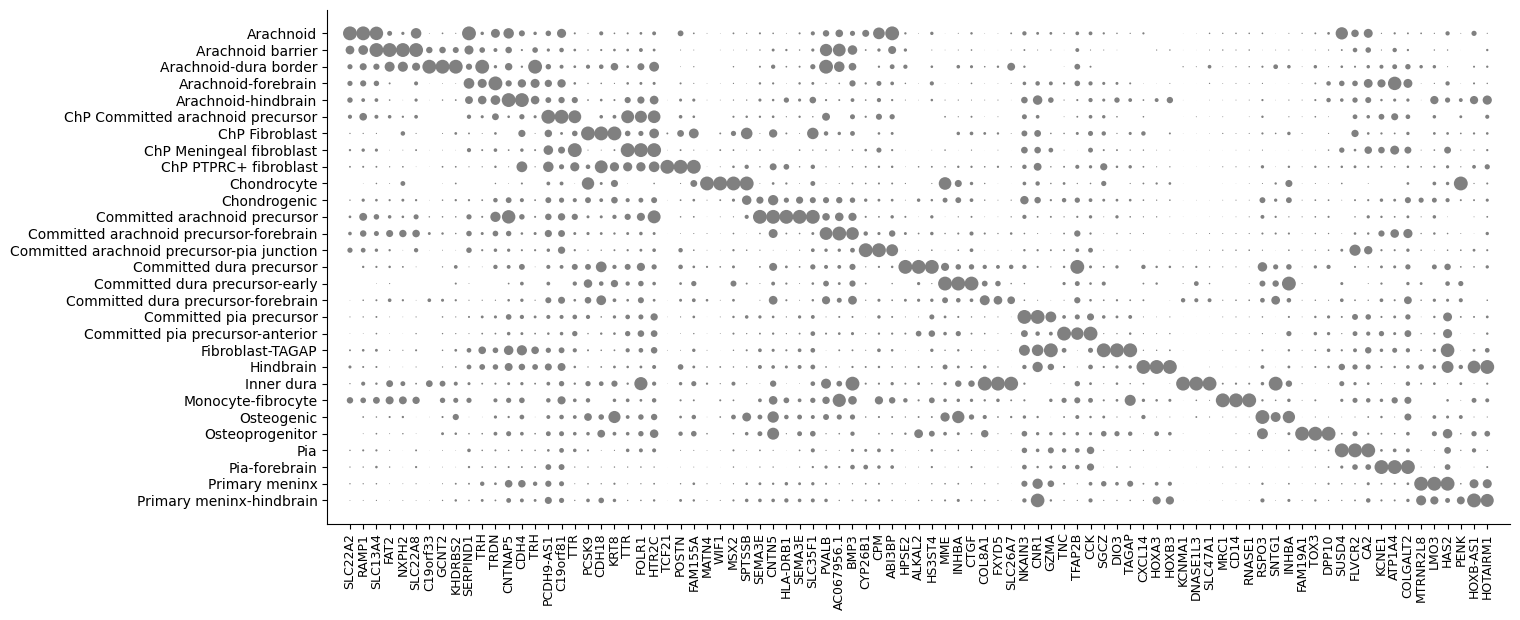

In [37]:
tick_labels = ['Arachnoid', 'Arachnoid barrier', 'Arachnoid-dura border',
 'Arachnoid-forebrain', 'Arachnoid-hindbrain',
 'ChP Committed arachnoid precursor', 'ChP Fibroblast',
 'ChP Meningeal fibroblast', 'ChP PTPRC+ fibroblast', 'Chondrocyte',
 'Chondrogenic', 'Committed arachnoid precursor', 'Committed arachnoid precursor-forebrain',
 'Committed arachnoid precursor-pia junction', 'Committed dura precursor',
 'Committed dura precursor-early', 'Committed dura precursor-forebrain',
 'Committed pia precursor', 'Committed pia precursor-anterior',
'Fibroblast-TAGAP', 'Hindbrain', 'Inner dura', 'Monocyte-fibrocyte',
 'Osteogenic', 'Osteoprogenitor', 'Pia', 'Pia-forebrain', 'Primary meninx',
 'Primary meninx-hindbrain']

with loompy.connect(fibroblasts, 'r') as ds:

    plt.figure(figsize = (15, 6), tight_layout = {'pad': 0})
    
    genes = ds.ra.Gene[markers]
    unique_clusters = np.unique(label_ix)
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    means = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        means[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        means[:, i] = means[:, i] / means[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=means.flatten()*100, c='grey', lw=0) 
    
    # label ticks
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=10)
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical', fontsize=9)
    
    # margins and invert y axis
    plt.margins(0.02, 0.05)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    #plt.savefig('FB_CellTypes_enriched3.png', dpi=300)